In [1]:
# In this project I will be analyzing voter data for
# presidential candidate rankings. I will use various
# methods to calculate each candidates chances of
# winning the presidential election. The real world 
# data was provided to me by UC Davis for educational
# purposes

In [38]:
# Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [39]:
# Read candidate ranking csv data file into a large numpy array
Rank = pd.read_csv('rankingcandidates.csv', delimiter=',')

In [40]:
# Create numpy array of dataframe
Arr = np.array(Rank)

In [41]:
# Load data onto a pandas dataframe
DF = pd.DataFrame(Rank)

# Initialize score values list for column labels
scores = [0]*len(Arr[0])

# Create column labels list
for i in range(Arr.shape[1]):
    scores[i] = 'Rank {}'.format(i+1)

# Reverse list for appropriate labels
scores.reverse()

# Set column labels for dataframe
DF.columns=scores

In [42]:
# Print dataframe head
DF.head()

,Rank 5,Rank 4,Rank 3,Rank 2,Rank 1
0,HC,BS,JK,TC,DT
1,BS,HC,JK,DT,TC
2,BS,DT,TC,HC,JK
3,BS,DT,HC,JK,TC
4,BS,HC,DT,JK,TC


In [43]:
# Rows correspond to voters
# Columns correspond to rankings
# Column 1 = Rank 5 (Best)
# Column 2 = Rank 4
# Column 3 = Rank 3
# Column 4 = Rank 2
# Column 5 = Rank 1 (Worst)


# HC = Hillary Clinton
# BS = Bernie Sanders
# JK = John Kasich
# TC = Ted Cruz
# DT = Donald Trump

In [44]:
# Print the size of the array
print(Arr.shape)

(239, 5)


In [45]:
# Print all unique candidates
print('All unique candidates: {}'.format(Arr[0]))

All unique candidates: ['HC' 'BS' 'JK' 'TC' 'DT']


In [46]:
# Restructure the array such that
# Column 1 pertains to Hillary Clinton
# Column 2 pertains to Bernie Sanders
# Column 3 pertains to John Kasich
# Column 4 pertains to Ted Cruz
# Column 5 pertains to Donald Trump

# For k = total number of candidates,
# Values will be determined by each candidates ranking for that given row
# Placed first = k
# Placed second = k-1
# Placed third = k-2
# .
# .
# .
# Placed last = 1

In [47]:
# Define function for restructuring array
def Restruct(Arr):
    
    # All unique candidates
    Candidates = Arr[0]
    
    # Initialize an array of zeros with proper dimensions
    A = np.zeros(Arr.shape)
    
    # Max potential score for a candidate for any given voter
    k = len(Candidates)
    
    # Restructure array using loops
    for i in range(Arr.shape[1]):
        for j in range(Arr.shape[0]):
            for h in range(Arr.shape[1]):
                if Arr[j][i] == Arr[0][h]:
                    A[j][h] = k         
        k = k-1   
    return A

In [48]:
# Create restructured Arr using function
A = Restruct(Arr)
A

array([[5., 4., 3., 2., 1.],
       [4., 5., 3., 1., 2.],
       [2., 5., 1., 3., 4.],
       ...,
       [4., 3., 1., 2., 5.],
       [5., 2., 3., 1., 4.],
       [4., 1., 2., 3., 5.]])

In [49]:
# Create and print dataframe of restructured data
DF2 = pd.DataFrame(A,columns=Arr[0])
DF2.head()

,HC,BS,JK,TC,DT
0,5.0,4.0,3.0,2.0,1.0
1,4.0,5.0,3.0,1.0,2.0
2,2.0,5.0,1.0,3.0,4.0
3,3.0,5.0,2.0,1.0,4.0
4,4.0,5.0,2.0,1.0,3.0


In [50]:
# Create 'plurality count' function
def PluralityCount(A):
    count = 0
    for i in range(len(A)):
        if A[i] == 5:
            count += 1
    return count

In [51]:
# Run plurality count method for each candidate
data = np.zeros(5)
for i in range(5):
    data[i] = PluralityCount(A[:,i])

#Create and print dataframe for plurality count method
labels = Arr[0]
pd.DataFrame(data, labels, columns=['Plurality Count'])

,Plurality Count
HC,84.0
BS,96.0
JK,7.0
TC,8.0
DT,44.0


Text(0.5, 1.0, 'Plurality Count per Candidate')

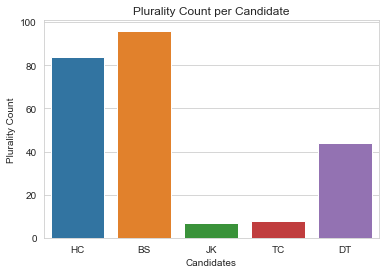

In [52]:
# Print barplot of Plurality Count results
sns.barplot(x=labels,y=data)
plt.xlabel('Candidates')
plt.ylabel('Plurality Count')
plt.title('Plurality Count per Candidate')

In [53]:
print('Bernie Sanders wins the Plurality Count!')

Bernie Sanders wins the Plurality Count!


In [54]:
# Run mean score method for each candidate
data = np.zeros(5)
for i in range(5):
    data[i] = round(np.average(A[:,i]),2)

# Create dataframe for mean score method
pd.DataFrame(data,labels,columns=['Avg Score'])

,Avg Score
HC,3.85
BS,3.74
JK,2.54
TC,2.17
DT,2.70


Text(0.5, 1.0, 'Avg Score per Candidate')

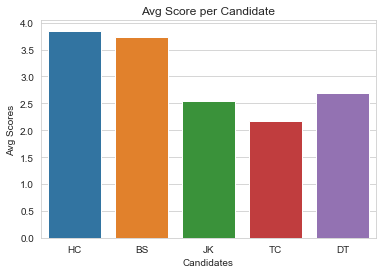

In [55]:
# Print barplot of Avg Score results
sns.barplot(x=labels,y=data)
plt.xlabel('Candidates')
plt.ylabel('Avg Scores')
plt.title('Avg Score per Candidate')

In [56]:
print('Hillary Clinton has the highest Avg Score!')

Hillary Clinton has the highest Avg Score!


In [57]:
# Run borda count method for each candidate
data = np.zeros(5)
B = A - np.ones(Arr.shape)
for i in range(5):
    data[i] = np.sum(B[:,i])

# Create and print data frame for borda count method
pd.DataFrame(data,labels,columns=['Borda Count'])

,Borda Count
HC,682.0
BS,655.0
JK,367.0
TC,279.0
DT,407.0


Text(0.5, 1.0, 'Borda Count per Candidate')

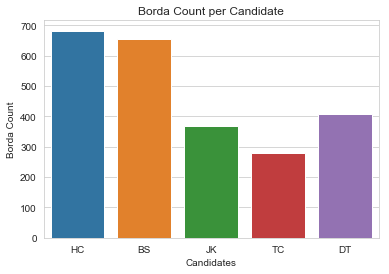

In [73]:
# Print barplot of borda count results
sns.barplot(x=labels,y=data)
plt.xlabel('Candidates')
plt.ylabel('Borda Count')
plt.title('Borda Count per Candidate')

In [59]:
print('Hillary Clinton wins the Borda Count!')

Hillary Clinton wins the Borda Count!


In [60]:
# Next I will create a network of the data in borda count matrix B to create a Markov Chain matrix
# to run the PageRank algorithm on

# PageRank returns the dominant eigenpair of a matrix with an 'importance score' in the dominant eigenvector.
# The max value index in the returned dominant eigenvector is the 'most important' candidate with the
# highest probability of winning the election. 

# If candidate is ranked 1st for a given voter, all other candidates
# in that row will 'point' to the first placed candidate.
# If candidate is ranked 2nd for a given voter, the
# 3rd, 4th and 5th placed candidates will all point to that voter
# And so on...
# The last placed candidate will not have anyone point to them
# This will be the structure of our network repeated for each row

# Note: We are working with a complete graph! All candidates have a positive plurality count. No isolated nodes
# Note: The matrix B we constructed to calculate the Borda count for each candidate represents our network identically,
#       this matrix will be used for our PageRank algorithm.

In [61]:
# Create Markov Chain matrix function for data in B to run Power Iteration Algorithm on
def Markov(B):
    M = np.zeros((5,5))
    for k in range(B.shape[1]):
        for i in range(B.shape[0]):
            for j in range(B.shape[1]):
                if B[i,k] < B[i,j]:
                    M[j,k] = M[j,k] + 1
    for i in range(B.shape[1]):
        M[:,i] = M[:,i]/sum(M[:,i])
    return M

In [62]:
# Create and print Markov matrix for our data in the Borda count matrix B using function
M = Markov(B)
M

array([[0.        , 0.41860465, 0.32767402, 0.28951256, 0.30418944],
       [0.41240876, 0.        , 0.31748727, 0.28508124, 0.29508197],
       [0.16788321, 0.17275748, 0.        , 0.21565731, 0.22404372],
       [0.15693431, 0.15282392, 0.15789474, 0.        , 0.17668488],
       [0.26277372, 0.25581395, 0.19694397, 0.20974889, 0.        ]])

In [63]:
# Verify that each column sum is approx. 1 up to 7 decimal places
for i in range(5):
    print(round(sum(M[:,i]),7)==1)

True
True
True
True
True


In [64]:
# Create power iteration function
def PowerIter(M):
    l0 = 0 # Initial value
    x = np.ones((5,1)) # Initial vector
    TOL = 0.00000001 # Tolerance level
    max_iter = 1000000

    # Power iteration algorithm
    for j in range(max_iter):
        u = x / np.linalg.norm(x,2)
        x = np.dot(M,u)
        l = np.dot(np.transpose(u),x) #eigenvalue
        if (np.linalg.norm(x-l*u,2) < TOL) | ((j > 1) & ((abs(l-l0)/(1+abs(l-l0))) <= TOL)):
            return [l, u] #return dominant eigenpair
        l0 = l
    return [False,'No solution: Try something else'] # If no solution within max_iter return error

In [65]:
# Run power iteration on Markov matrix M using function
[l,u] = PowerIter(M)

# Check if algorithm was successful
if l==False:
    print(u)
else:
    print('Algorithm was successful!')

# Print dominant eigenpair returned
print('Dominant eigenvalue returned: {}'.format(l))
print('Dominant eigenvector returned: \n{}'.format(u))

Algorithm was successful!
Dominant eigenvalue returned: [[1.]]
Dominant eigenvector returned: 
[[0.55824989]
 [0.54969153]
 [0.34728666]
 [0.3004314 ]
 [0.41872334]]


In [66]:
# Adjust dominant eigenvector such that its element sum is 1
u = u/sum(u[:,0])
print('Adjusted dominant eigenvector with total element sum of 1: \n{}'.format(u))

Adjusted dominant eigenvector with total element sum of 1: 
[[0.25673947]
 [0.25280348]
 [0.15971735]
 [0.13816858]
 [0.19257112]]


In [67]:
# Confirm sum of eigenvector elements is approx. 1 up to 7 decimal places and is properly adjusted
sum(u[:,0])-1 <= 0.00000001

True

Text(0.5, 1.0, 'Importance Scores via PageRank per Candidate')

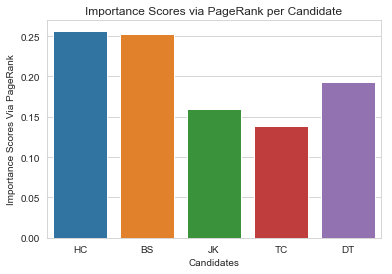

In [71]:
# Print a barplot of eigenvector values (importance scores)
u = u.reshape((1,5))
sns.barplot(x=list(labels),y=list(u[0]))
plt.xlabel('Candidates')
plt.ylabel('Importance Scores Via PageRank')
plt.title('Importance Scores via PageRank per Candidate')

In [69]:
# Find max value index in dominant eigenvector returned
Max = np.max(u)
Index = list(u.reshape((5,1))).index(Max)
print('Max value index in dominant eigenvector: {}'.format(Index))
print('Corresponding to: {}'.format(labels[Index]))

Max value index in dominant eigenvector: 0
Corresponding to: HC


In [70]:
#Conclusion:
print('Conclusion: Candidate with highest probability to win (greatest importance score) according to our PageRank results is {}'.format('Hillary Clinton'))

Conclusion: Candidate with highest probability to win (greatest importance score) according to our PageRank results is Hillary Clinton
